In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  8 23:37:12 2019

@author: phdgil
"""
# SVR , cross-validation , MSE 
# with Recursive Feature Elimination (RFE) to get the informative features 

import random
import pandas as pd
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

import numpy as np 

wdir = '/Users/beomjin_seo/Documents/work_space/kist-europe/QSAR/AOP_data/'
csv = '5-alpha-reductase-maccs-remcols-stdval.csv'

df = pd.read_csv(wdir+csv)
df = df.dropna(axis=0)
y = df['Standard Value']
x = df.drop(['Molecule', 'Standard Value'], axis=1)
#datasize = df.shape[0]
#sampling = 200

#hyperparam for cross_val
test_size = 0.1  
cv = 5  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_size)  #data split 

#hyperparam for SVR
kernel = 'linear'
svr = SVR(kernel=kernel, gamma='auto')
feature = range(10,30,2)  ### N of features is selected as 10, 12, 14 ,,, to 30 

for f in feature:
    
    print ('feature :', f)
    rfe = RFE(svr, n_features_to_select=f, step=1)  
    ### when N of feature are 10, 12, 14 ,, 30 
    ### take feature selection instantiate to 'rfe' with svc as param
    
    rfe = rfe.fit(x_train,y_train)
    print('N of features : {}\n feature support : {}\n feature ranking : {} '.format(f,rfe.support_,rfe.ranking_))

    mse = cross_val_score(rfe, 
                        x_train, 
                        y_train, 
                        scoring='neg_mean_squared_error',  
                        cv=cv )
    mse *= -1
    rmse  = np.sqrt(mse)
    log_rmse = np.log(rmse)

    print('{} SVR with {} features LOG_RMSE : '.format(kernel, f), log_rmse)
    print('{} SVR with {} features LOG_RMSE.mean : '.format(kernel, f) , np.sum(log_rmse)/cv)
    



feature : 10
N of features : 10
 feature support : [False False False False False False  True False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
  True False  True False False  True False False False False False False
 False False False]
 feature ranking : [ 97  77  76 114  36  52   1  89 111 112  88  30   1  61  59  83   3  72
  85 109  90  45  78  86  58  57 104  34 113  49  92  63  25   4   1  73
  40  66  91  65  41  70  42  12  

linear SVR with 20 features LOG_RMSE :  [9.5855088  6.65161272 9.56425098 7.9914711  7.65667868]
linear SVR with 20 features LOG_RMSE.mean :  8.289904455817087
feature : 22
N of features : 22
 feature support : [False False False False False False  True False False False False False
  True False False False  True False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False  True  True False False False
 False False  True False False False  True False False  True False  True
 False False False  True False False False False  True  True False False
 False False False  True False False False  True False False False False
 False False False False False  True False  True False False False  True
 False False False False False False False False False False False False
  True False  True False False  True False False False False False False
 False False False]
 feature ranking : [ 85  65  64 102  24

--------

[0.5, 0.6, 0.9, 0.91, 1.6, 1.7, 1.7, 1.7, 1.77, 2.0, 2.11, 2.19, 2.35, 2.4, 2.42, 2.5, 2.6, 2.6, 2.7, 2.93, 3.05, 3.22, 3.3, 3.3, 3.31, 3.4, 4.3, 4.56, 5.0, 5.08, 5.44, 5.6, 5.6, 5.63, 5.7, 5.8, 5.8, 6.0, 6.8, 7.25, 7.31, 7.9, 7.943, 8.0, 8.1, 8.1, 8.128, 8.4, 8.5, 8.6, 8.6, 8.71, 9.5, 9.5, 9.53, 9.57, 10.0, 10.5, 10.6, 11.0, 11.0, 11.2, 11.8, 11.9, 12.5, 12.9, 14.0, 14.0, 14.0, 14.0, 14.4, 14.4, 14.5, 15.6, 15.8, 16.9, 17.0, 17.0, 17.2, 17.2, 18.2, 19.0, 19.0, 19.1, 19.1, 19.95, 20.0, 20.0, 20.0, 20.5, 20.9, 21.0, 21.38, 22.5, 23.0, 24.6, 25.0, 26.0, 26.0, 29.0, 30.3, 32.0, 32.36, 32.36, 32.36, 32.8, 34.67, 34.67, 34.9, 35.0, 38.0, 38.3, 40.0, 42.0, 42.0, 50.0, 52.0, 58.0, 59.0, 59.8, 60.0, 60.0, 60.26, 62.0, 63.0, 74.0, 75.0, 79.43, 79.43, 83.7, 89.13, 92.9, 93.0, 93.33, 94.0, 97.72, 100.0, 100.0, 102.0, 107.0, 112.2, 114.82, 114.82, 116.0, 117.49, 120.0, 120.0, 120.0, 120.0, 120.2, 120.2, 127.0, 127.0, 128.82, 129.0, 130.0, 130.0, 131.83, 134.0, 134.0, 137.0, 138.0, 141.0, 147.91, 1

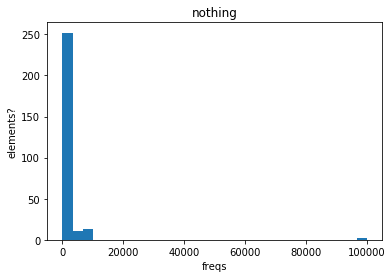

In [7]:
ylist = y.values.tolist()
ylist.sort()
print(ylist)
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(ylist, bins=30)#, , width = 0.9
# print(n)
ax.set_xlabel('freqs')
ax.set_ylabel('elements?')
ax.set_title(r'nothing')

# plt.xlim(0, 10)
# plt.ylim(0, 300)

plt.show()

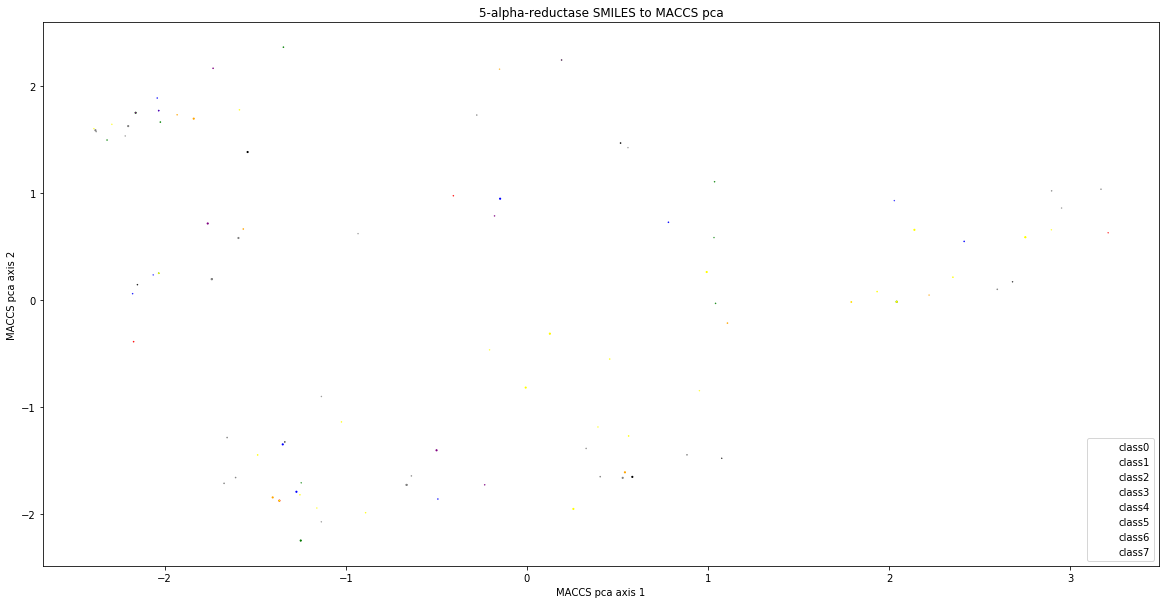

In [10]:
#df_id = df[['Standard Value']]

#PCA: Data plotting
from sklearn.decomposition import PCA

pca = PCA(n_components = 3).fit(x)
fp_pca = pca.transform(x)
fp_pca_df = pd.DataFrame(fp_pca, columns=['pca1','pca2','pca3'])
df_label_pca = pd.concat([y, fp_pca_df], axis=1)

fig, ax = plt.subplots(figsize=(20, 10)) 

class0 = df_label_pca[df_label_pca['Standard Value'].between(-1, 2)]
class1 = df_label_pca[df_label_pca['Standard Value'].between(2, 6)]
class2 = df_label_pca[df_label_pca['Standard Value'].between(6, 10)]
class3 = df_label_pca[df_label_pca['Standard Value'].between(10, 20)]
class4 = df_label_pca[df_label_pca['Standard Value'].between(20, 50)]
class5 = df_label_pca[df_label_pca['Standard Value'].between(50, 100)]
class6 = df_label_pca[df_label_pca['Standard Value'].between(100, 500)]
class7 = df_label_pca[df_label_pca['Standard Value'] > 500]

plt.scatter(class0['pca1'],class0['pca2'],class0['pca3'],c='red',label='class0')
plt.scatter(class1['pca1'],class1['pca2'],class0['pca3'],c='blue',label='class1')
plt.scatter(class2['pca1'],class2['pca2'],class0['pca3'],c='black',label='class2')
plt.scatter(class3['pca1'],class3['pca2'],class0['pca3'],c='orange',label='class3')
plt.scatter(class4['pca1'],class4['pca2'],class0['pca3'],c='green',label='class4')
plt.scatter(class5['pca1'],class5['pca2'],class0['pca3'],c='purple',label='class5')
plt.scatter(class6['pca1'],class6['pca2'],class0['pca3'],c='grey',label='class6')
plt.scatter(class7['pca1'],class7['pca2'],class0['pca3'],c='yellow',label='class7')
plt.title('5-alpha-reductase SMILES to MACCS pca')
plt.xlabel('MACCS pca axis 1')
plt.ylabel('MACCS pca axis 2')
plt.legend(loc=4)